In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import cortico_cereb_connectivity.globals as gl
import glob


## MDTB as training dataset
MDTB dataset is used for training the models. X and Y are crossed across ses-s1 and ses-s2. In other words, cortical data from ses-s2 was used to predict cerebellar data from ses-s1.

Trained models were then evaluated on new datasets 

/home/ROBARTS/lshahsha/Documents/Projects/selective_recruitment/env/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/ROBARTS/lshahsha/Documents/Projects/selective_recruitment/env/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/ROBARTS/lshahsha/Documents/Projects/selective_recruitment/env/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/ROBARTS/lshahsha/Documents/Projects/selective_recruitment/env/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot: xlabel='log_alpha', ylabel='R'>

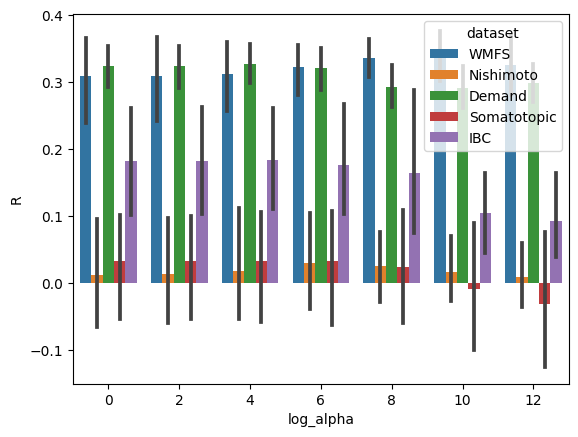

In [50]:
save_path = gl.conn_dir+ f"eval"
T = []
for dataset in ["WMFS", "Nishimoto", "Demand", "Somatotopic", "IBC"]:
    files = glob.glob(f"/{save_path}/{dataset}*.tsv")
    for f in files:

        # get session name
        a = f.split('/')
        fname = a[-1]
        items = fname.split('_')
        ses_name = items[-1].split('.')[0]
        
        # get the dataframe
        dd = pd.read_csv(f, sep='\t')
        # add a column for the name of the dataset
        dd['dataset'] = dataset
        dd['ses_name'] = ses_name

        # get the noise ceilings
        dd['noiseceiling_Y']=np.sqrt(dd.noise_Y_R)
        dd['noiseceiling_XY']=np.sqrt(dd.noise_Y_R)*np.sqrt(dd.noise_X_R)
        dd['R'] = dd.R_eval/dd["noiseceiling_XY"]
        T.append(dd)
        

df = pd.concat(T)
# sns.barplot(x='dataset',y='noiseceiling_XY',data=df, hue='log_alpha')
sns.barplot(data=df,x='log_alpha',y='R',hue='dataset')


<AxesSubplot: xlabel='log_alpha', ylabel='noiseceiling_Y'>

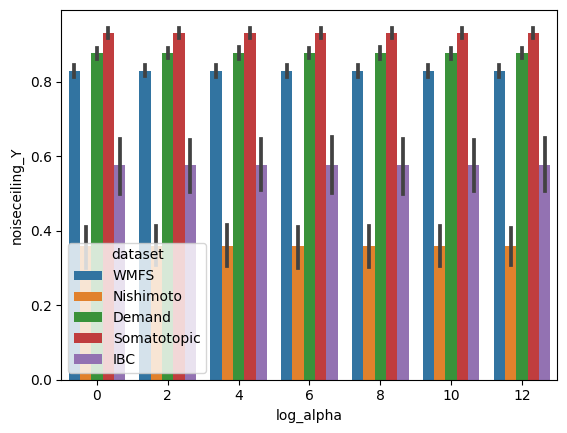

In [51]:
sns.barplot(data=df,x='log_alpha',y='noiseceiling_Y',hue='dataset')

<AxesSubplot: xlabel='log_alpha', ylabel='noiseceiling_XY'>

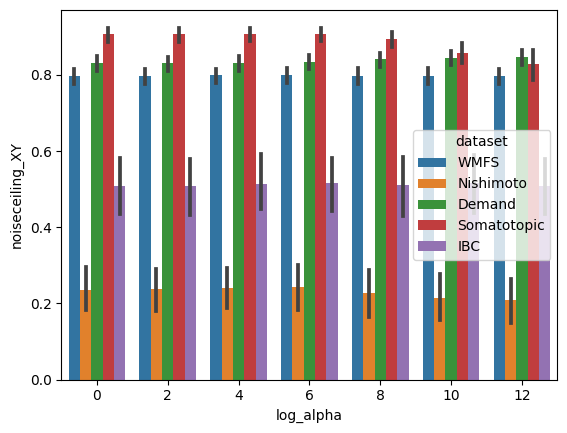

In [52]:
sns.barplot(data=df,x='log_alpha',y='noiseceiling_XY',hue='dataset')